# Treasure Bikes

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [445]:
df = pd.read_csv('treasure_bikes_pageviews.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   td_client_id     20000 non-null  object
 1   td_path          20000 non-null  object
 2   td_url           20000 non-null  object
 3   td_referrer      20000 non-null  object
 4   td_host          20000 non-null  object
 5   td_browser       19042 non-null  object
 6   td_ip            20000 non-null  object
 7   td_os            18150 non-null  object
 8   td_screen        19091 non-null  object
 9   td_language      18852 non-null  object
 10  td_canonical_id  20000 non-null  object
 11  time             20000 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


In [446]:
df.head()

,td_client_id,td_path,td_url,td_referrer,td_host,td_browser,td_ip,td_os,td_screen,td_language,td_canonical_id,time
0,0a21a8e3-5758-4584-ba6e-ee5431b46d13,/cart/,https://www.treasurebikes.com/cart/?utm_source...,https://www.google.com,https://www.treasurebikes.com,Chrome Mobile iOS,37.230.91.92,Other,360x640,-,ee5431b46d13,1602792227
1,0a1f5100-1716-444a-8f6c-eb4e80d669d1,/shop/accessories/,https://www.treasurebikes.com/shop/accessories...,https://googlead.doubleclick.net,https://www.treasurebikes.com,Firefox,180.233.39.194,Android,NaN,NaN,eb4e80d669d1,1602793427
2,0a1f5100-1716-444a-8f6c-eb4e80d669d1,/shop/bicycles/,https://www.treasurebikes.com/shop/bicycles/?u...,https://www.google.com,https://www.treasurebikes.com,Firefox,180.233.39.194,Android,NaN,NaN,eb4e80d669d1,1602794627
3,0a07e6ce-a223-46f1-b3ef-c7bdcc3e9ce7,/shop/accessories/,https://www.treasurebikes.com/shop/accessories...,https://www.twitter.com,https://www.treasurebikes.com,Opera Mini,234.181.198.238,iOS,1280x800,th,c7bdcc3e9ce7,1602792227
4,0a07e6ce-a223-46f1-b3ef-c7bdcc3e9ce7,/shop/accessories/,https://www.treasurebikes.com/shop/accessories...,https://www.google.com,https://www.treasurebikes.com,Opera Mini,234.181.198.238,iOS,1280x800,th,c7bdcc3e9ce7,1602793427


## URL UTM parameters

In [214]:
df['utm'] = df.td_url.str.split('/').map(lambda x: x[-1].split('&'))

In [215]:
df['source'] = df.utm.str[0].str.split('=').map(lambda x: x[-1])

Text(0.5, 0, 'Percent')

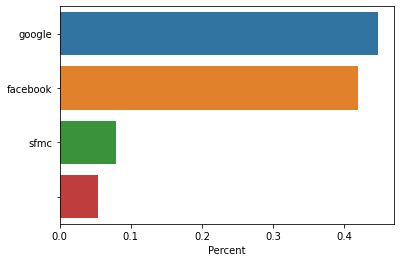

In [271]:
sns.barplot(x=df.source.value_counts(normalize=True, ascending=False), y=df.source.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

In [101]:
df['campaign'] = df.utm.str[1].str.split('=').str[1]

Text(0.5, 0, 'Percent')

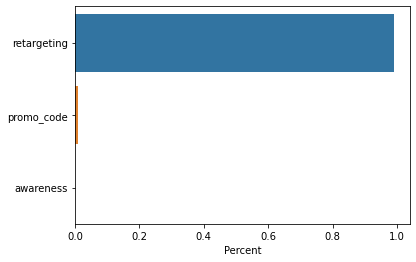

In [270]:
sns.barplot(x=df.campaign.value_counts(normalize=True, ascending=False), y=df.campaign.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

In [104]:
df['medium'] = df.utm.str[2].str.split('=').str[1]

Text(0.5, 0, 'Percent')

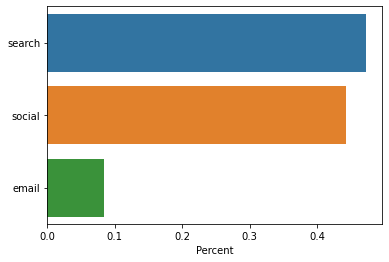

In [269]:
sns.barplot(x=df.medium.value_counts(normalize=True, ascending=False), y=df.medium.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

In [228]:
df.medium.value_counts(normalize=True, ascending=True).index

Index(['email', 'social', 'search'], dtype='object')

## referrer

In [19]:
df['referrer'] = df.td_referrer.str.split('.').map(lambda x: x[1])

Text(0.5, 0, 'Percent')

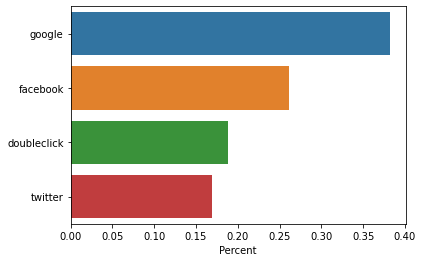

In [268]:
#df.groupby('referrer').size().plot(kind='barh')
sns.barplot(x=df.referrer.value_counts(normalize=True, ascending=False), y=df.referrer.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

## browser

In [255]:
mobile_browser = ['UC Browser', 'Opera Mini', 'Mobile Safari', 'Chrome Mobile', 'Chrome Mobile iOS', 'Firefox Mobile', 'Android']
condlist = [df.td_browser == 'Other', df.td_browser.isin(mobile_browser)]
choicelist = ['Other', 'mobile browser']
df['browser'] = np.select(condlist, choicelist, 'desktop browser')

Text(0.5, 0, 'Percent')

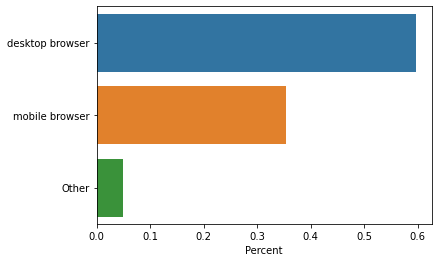

In [374]:
sns.barplot(x=df.browser.value_counts(normalize=True, ascending=False), y=df.browser.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

Text(0.5, 0, 'Percent')

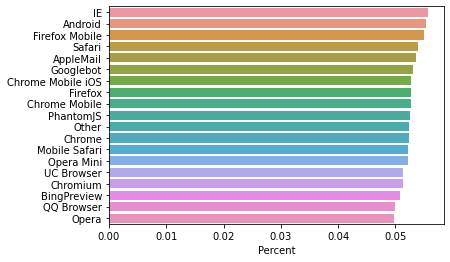

In [373]:
sns.barplot(x=df.td_browser.value_counts(normalize=True, ascending=False), y=df.td_browser.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

## ip

In [145]:
import urllib
import time
import json

In [168]:
def location(ip):

    url = 'http://ip-api.com/json/'+ip
    req = urllib.request.Request(url)
    loc = urllib.request.urlopen(req).read()
    time.sleep(1)
    
    return loc

In [171]:
# df['ip'] = df.td_ip.value_counts().reset_index()['index'].map(lambda x: location(x))

0     b'{"status":"success","country":"Spain","count...
1     b'{"status":"success","country":"China","count...
2     b'{"status":"success","country":"China","count...
3     b'{"status":"fail","message":"reserved range",...
4     b'{"status":"fail","message":"reserved range",...
                            ...                        
95    b'{"status":"success","country":"United Kingdo...
96    b'{"status":"success","country":"United Kingdo...
97    b'{"status":"success","country":"United States...
98    b'{"status":"success","country":"United States...
99    b'{"status":"success","country":"China","count...
Name: td_ip, Length: 100, dtype: object

In [203]:
df.td_ip[:1].map(lambda x: location(x))[0]

b'{"status":"success","country":"Spain","countryCode":"ES","region":"AN","regionName":"Andalusia","city":"La Roda de Andalucia","zip":"41590","lat":37.2049,"lon":-4.7819,"timezone":"Europe/Madrid","isp":"Servihosting","org":"FIBRA \xc3\x93PTICA ANDALUC\xc3\x8dA SL","as":"AS29119 ServiHosting Networks S.L.","query":"37.230.91.92"}'

In [204]:
json.loads(df.td_ip[:1].map(lambda x: location(x))[0])

{'status': 'success',
 'country': 'Spain',
 'countryCode': 'ES',
 'region': 'AN',
 'regionName': 'Andalusia',
 'city': 'La Roda de Andalucia',
 'zip': '41590',
 'lat': 37.2049,
 'lon': -4.7819,
 'timezone': 'Europe/Madrid',
 'isp': 'Servihosting',
 'org': 'FIBRA ÓPTICA ANDALUCÍA SL',
 'as': 'AS29119 ServiHosting Networks S.L.',
 'query': '37.230.91.92'}

Text(0, 0.5, 'Percent')

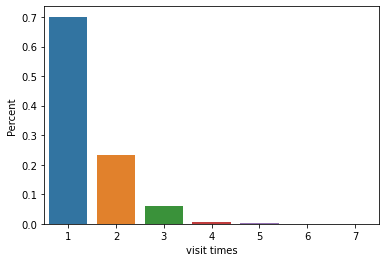

In [444]:
sns.barplot(x=df.td_ip.value_counts().value_counts(normalize=True).index, y=df.td_ip.value_counts().value_counts(normalize=True))
plt.xlabel('visit times')
plt.ylabel('Percent')

In [ ]:
sns.barplot(x=df.os.value_counts(normalize=True, ascending=False), y=df.os.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

In [ ]:
def location(ip):

    url = 'http://ip-api.com/json/'+ip
    req = urllib.request.Request(url)
    loc = urllib.request.urlopen(req).read()
    time.sleep(1)
    
    return loc

In [ ]:
dfip = df.td_ip.value_counts().reset_index()['index'][:2700].map(lambda x: location(x))

In [51]:
data = df.td_ip.value_counts()

In [54]:
data.reset_index().rename(columns={data.index.name:'ip'}, inplace=True)

In [71]:
json.loads(dfip)

TypeError: the JSON object must be str, bytes or bytearray, not Series

In [92]:
dfip.map(lambda x: json.loads(x))

KeyError: 'country'

## os

In [274]:
windows = ['Windows', 'Windows 7', 'Windows 8', 'Windows 8.1']
os = ['iOS', 'Mac OS X']
linux = ['Linux', 'Ubuntu', 'Android']
condlist = [df.td_os.isin(windows), df.td_os.isin(os), df.td_os.isin(linux)]
choicelist = ['Windows', 'Mac OS/iOS', 'Linux/Android']
df['os'] = np.select(condlist, choicelist, df.td_os)

Text(0.5, 0, 'Percent')

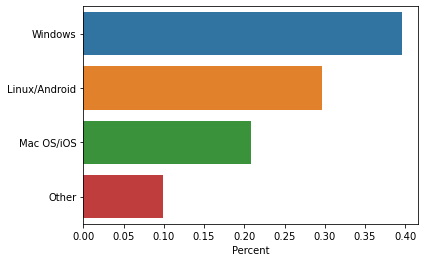

In [275]:
sns.barplot(x=df.os.value_counts(normalize=True, ascending=False), y=df.os.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

## screen

In [404]:
screen = pd.DataFrame(df.dropna().td_screen.str.split('x').str[0].astype(int)*df.dropna().td_screen.str.split('x').str[1].astype(int))

In [405]:
condlist = [screen < 1024000, screen >= 1904640]
choicelist = ['small', 'large']
screen['size'] = np.select(condlist, choicelist, 'intermediate')

Text(0.5, 0, 'Percent')

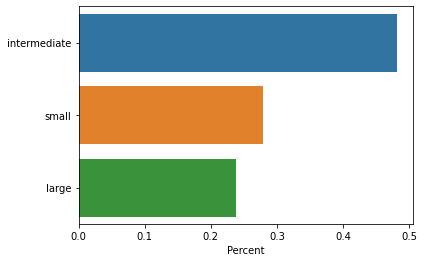

In [406]:
sns.barplot(x=screen['size'].value_counts(normalize=True, ascending=False), y=screen['size'].value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

Text(0.5, 0, 'Percent')

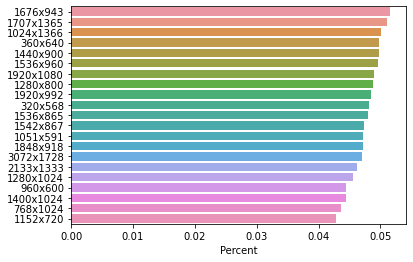

In [340]:
sns.barplot(x=df.td_screen.value_counts(normalize=True, ascending=False), y=df.td_screen.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

## language

In [384]:
condlist = [df.td_language=='fr', df.td_language=='ko', df.td_language=='lv', df.td_language=='hr', df.td_language=='ja-jp', 
            df.td_language=='en-us',
            df.td_language=='pt-br', df.td_language=='en-au', df.td_language=='es-419', df.td_language=='es', df.td_language=='ja', 
            df.td_language=='uk', df.td_language=='th', df.td_language=='ko-kr' ]
choicelist = ['French', 'Korean', 'Latvian', 'Croatian', 'Japanese', 'English', 'Portuguese', 'English', 'Spanish', 'Spanish', 'Japanese', 
              'Ukrainian', 'Thai', 'Korean']
#df['language'] = np.select(condlist, choicelist, 'English')
df['language'] = np.select(condlist, choicelist, df.td_language)

Text(0.5, 0, 'Percent')

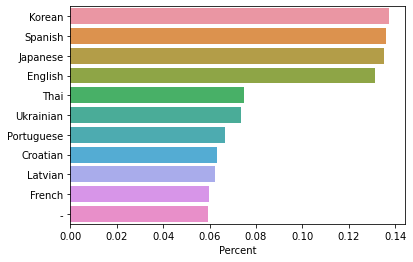

In [385]:
sns.barplot(x=df.language.value_counts(normalize=True, ascending=False), y=df.language.value_counts(normalize=True, ascending=False).index)
plt.xlabel('Percent')

## time

In [410]:
from datetime import datetime, timedelta

In [431]:
time = df.time.map(lambda x: datetime.fromtimestamp(x))

Text(0, 0.5, 'Percent')

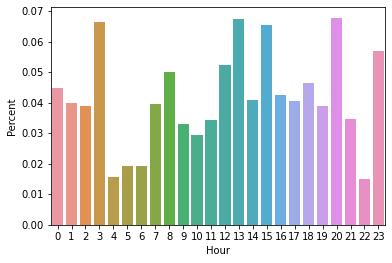

In [436]:
sns.barplot(x=time.dt.hour.value_counts(normalize=True, ascending=False).index, y=time.dt.hour.value_counts(normalize=True, ascending=False))
plt.xlabel('Hour')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

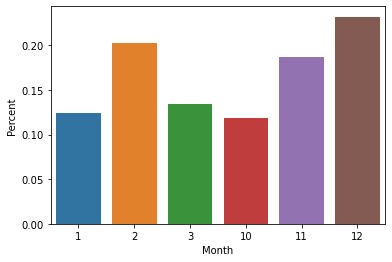

In [437]:
sns.barplot(x=time.dt.month.value_counts(normalize=True, ascending=False).index, y=time.dt.month.value_counts(normalize=True, ascending=False))
plt.xlabel('Month')
plt.ylabel('Percent')